In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the data
books = pd.read_csv(r"C:\Users\ADMIN\assignment\assignment 9 association rules\book.csv")

In [7]:
books.head(6)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1


In [8]:
books.shape

(2000, 11)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


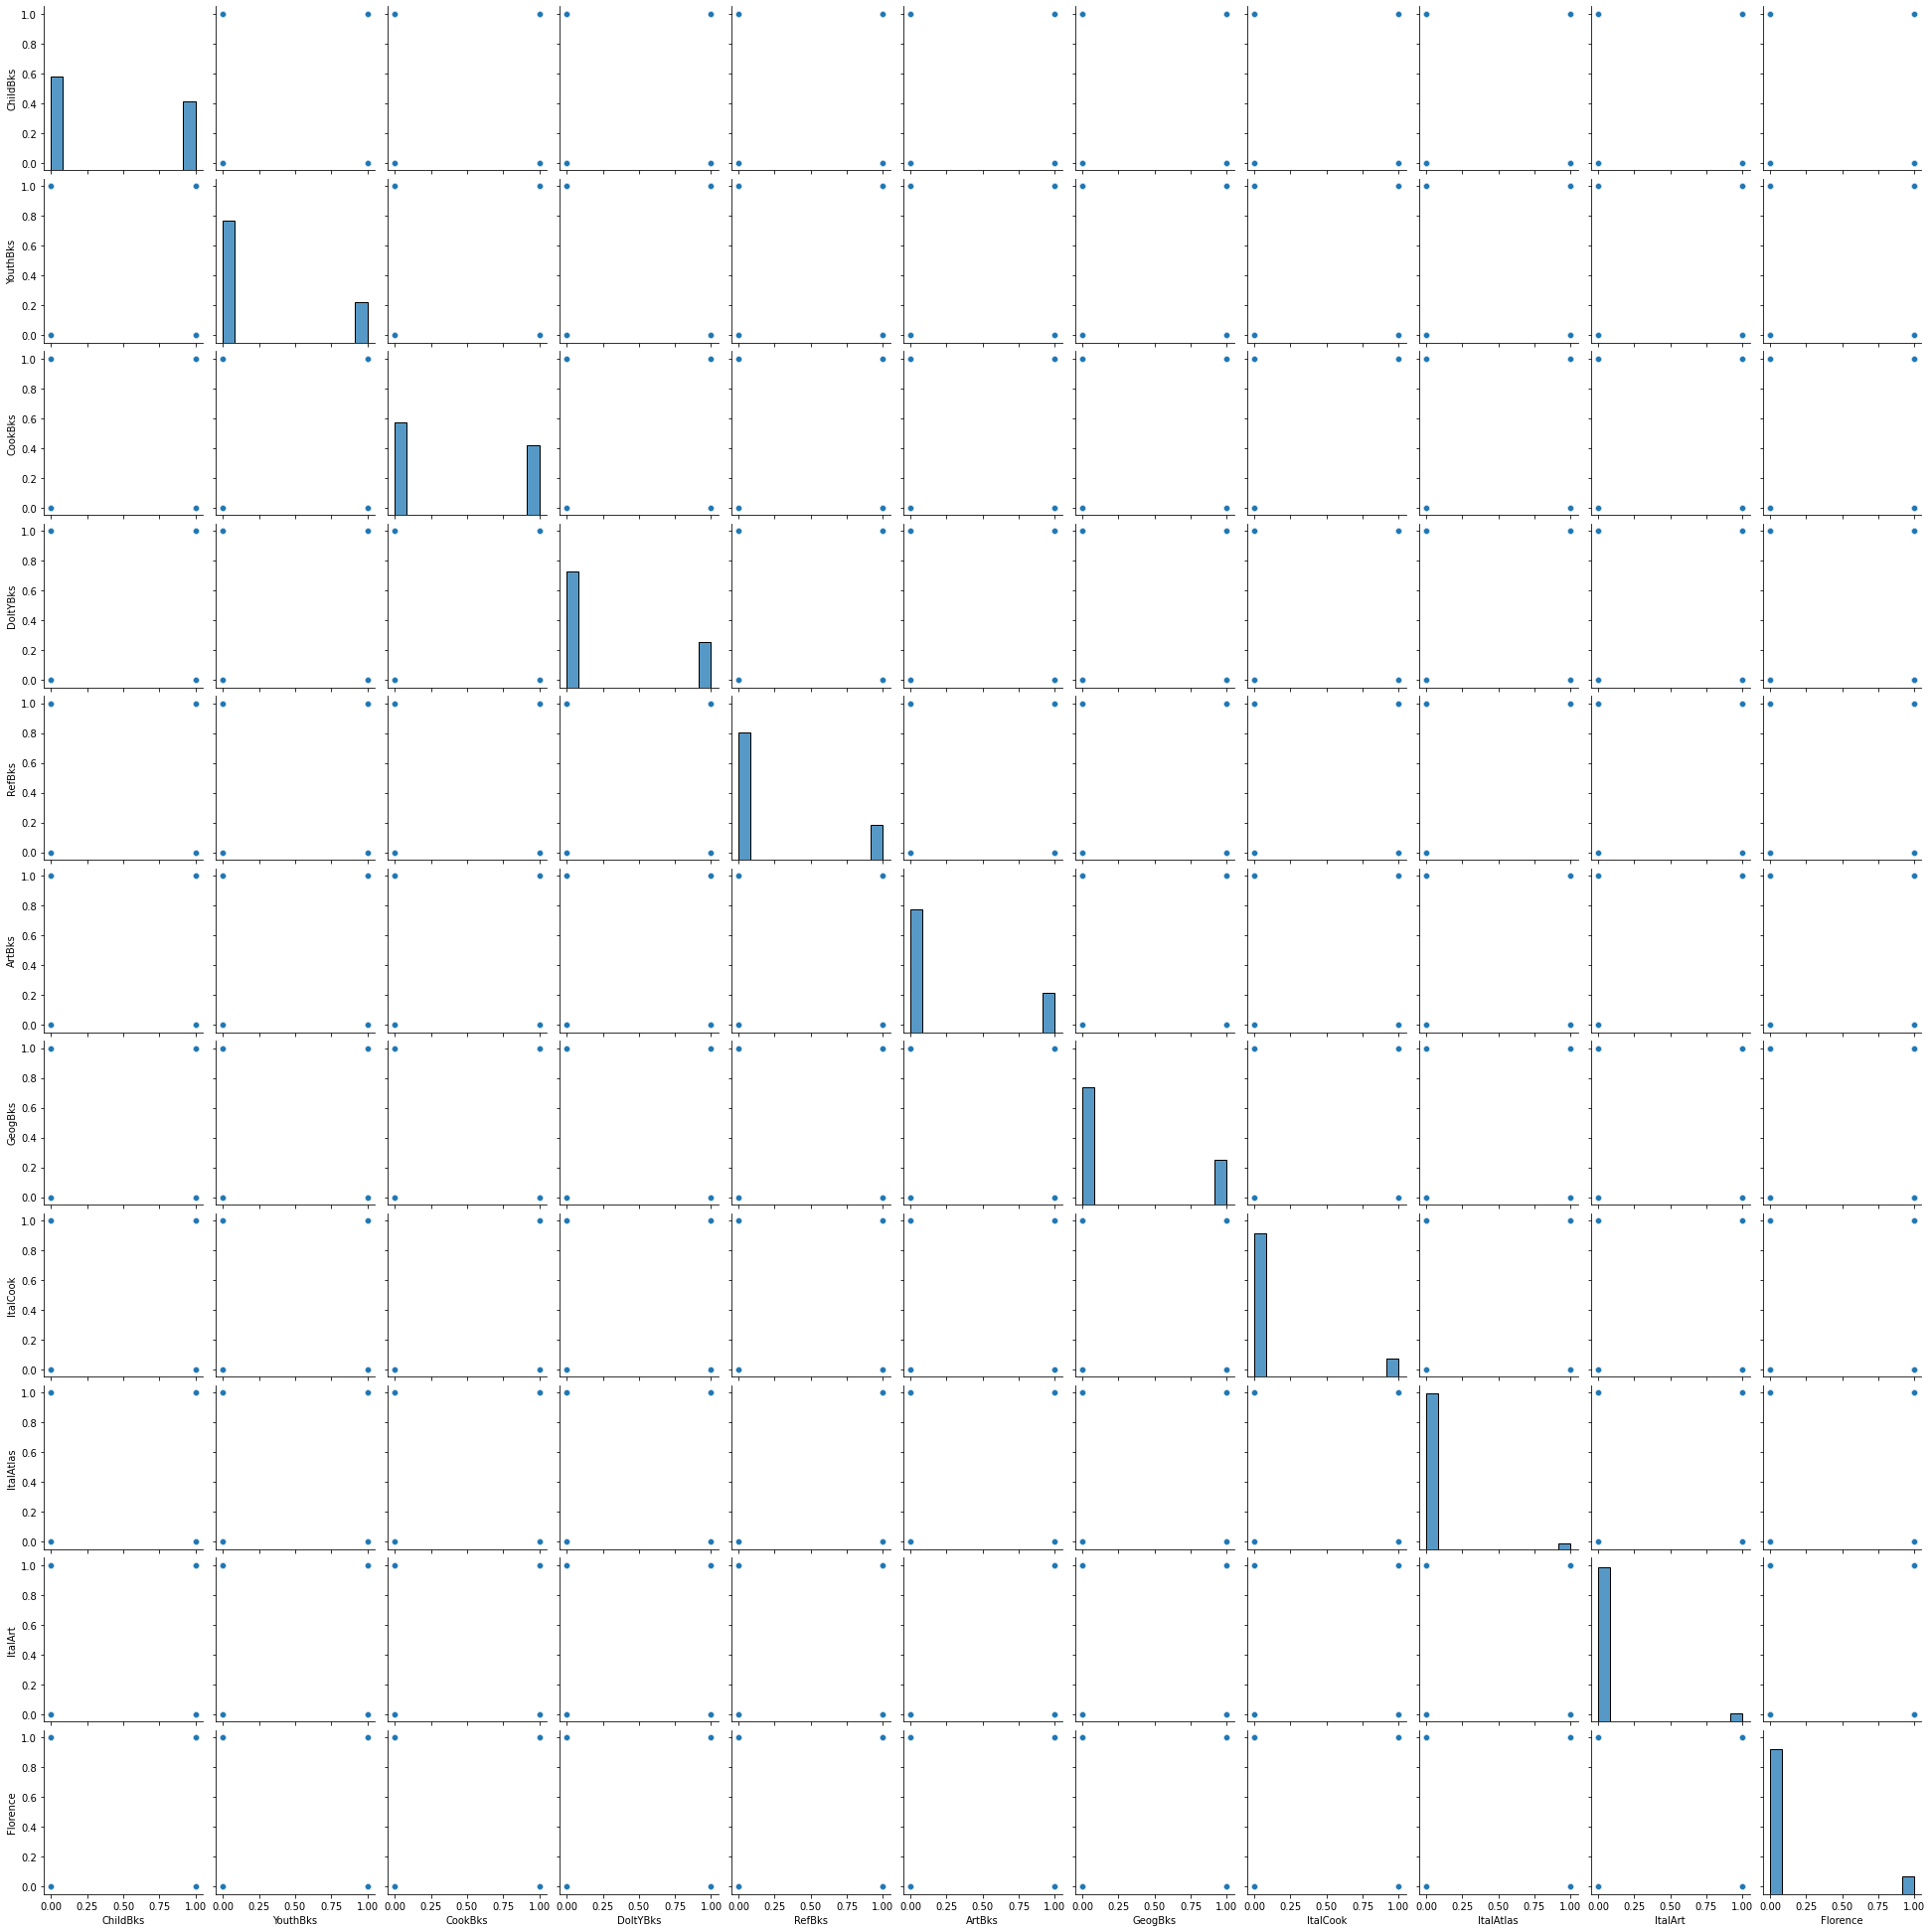

In [9]:
sns.pairplot(books)

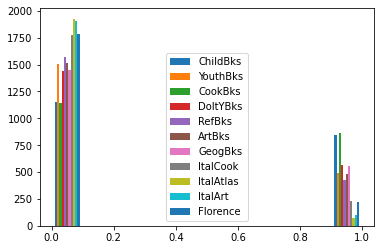

In [12]:
plt.hist(books)
plt.legend(books)

In [13]:
frequent_itemset=apriori(books,min_support=0.1,use_colnames=True,max_len=6)
frequent_itemset

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [14]:
rules=association_rules(frequent_itemset,metric='confidence',min_threshold=0.75)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917,0.537390
2,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
3,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831
4,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,0.562171
5,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
6,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
7,"(ArtBks, ChildBks)",(CookBks),0.1625,0.431,0.1265,0.778462,1.806175,0.056462,2.568403,0.532948
8,"(ArtBks, CookBks)",(ChildBks),0.1670,0.423,0.1265,0.757485,1.790745,0.055859,2.379235,0.530100
9,"(GeogBks, ChildBks)",(CookBks),0.1950,0.431,0.1495,0.766667,1.778809,0.065455,2.438571,0.543883


In [15]:
frequent_itemset1=apriori(books,min_support=0.08,use_colnames=True,max_len=4)
frequent_itemset1

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [16]:
rules1=association_rules(frequent_itemset1,metric='confidence',min_threshold=0.75)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917,0.537390
2,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
3,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902,0.549148
4,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481,0.562478
5,"(YouthBks, ArtBks)",(ChildBks),0.1010,0.423,0.0805,0.797030,1.884231,0.037777,2.842780,0.522002
6,"(GeogBks, YouthBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884,0.551605
7,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831
8,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,0.562171
9,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345


In [18]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
13,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
14,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
6,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
12,"(GeogBks, ArtBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000,0.540115
15,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
2,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
5,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
11,"(GeogBks, DoItYBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446,0.534479
3,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831


In [19]:
rules1.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
15,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf,0.621858
30,"(YouthBks, CookBks, DoItYBks)",(ChildBks),0.0950,0.423,0.0820,0.863158,2.040562,0.041815,4.216538,0.563469
4,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481,0.562478
32,"(GeogBks, YouthBks, CookBks)",(ChildBks),0.0970,0.423,0.0830,0.855670,2.022861,0.041969,3.997786,0.559967
16,"(DoItYBks, RefBks)",(ChildBks),0.1055,0.423,0.0900,0.853081,2.016739,0.045373,3.927323,0.563611
19,"(GeogBks, RefBks)",(ChildBks),0.1105,0.423,0.0940,0.850679,2.011061,0.047259,3.864152,0.565205
33,"(ArtBks, ChildBks, DoItYBks)",(CookBks),0.0950,0.431,0.0820,0.863158,2.002687,0.041055,4.158077,0.553227
29,"(YouthBks, ChildBks, DoItYBks)",(CookBks),0.0950,0.431,0.0820,0.863158,2.002687,0.041055,4.158077,0.553227
35,"(GeogBks, ChildBks, DoItYBks)",(CookBks),0.1045,0.431,0.0890,0.851675,1.976043,0.043960,3.836161,0.551578


In [20]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917,0.537390
2,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
3,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902,0.549148
4,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481,0.562478
5,"(YouthBks, ArtBks)",(ChildBks),0.1010,0.423,0.0805,0.797030,1.884231,0.037777,2.842780,0.522002
6,"(GeogBks, YouthBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884,0.551605
7,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831
8,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,0.562171
9,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345


<Axes: xlabel='ItalCook', ylabel='CookBks'>

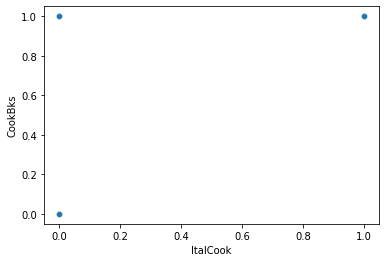

In [21]:
sns.scatterplot(x=books.ItalCook ,y=books.CookBks)

In [22]:
### loading my_movies table

In [24]:
mov = pd.read_csv(r"C:\Users\ADMIN\assignment\assignment 9 association rules\my_movies.csv")

In [26]:
mov.head(7)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0


In [27]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [28]:
## data cleaning

In [29]:
mov1 = mov.drop(['V1','V2','V3','V4','V5'],axis = 1)

In [30]:
mov1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


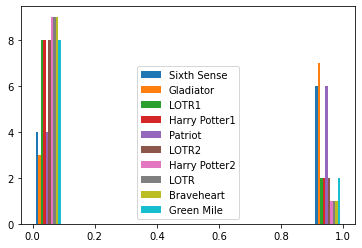

In [31]:
plt.hist(mov1)
plt.legend(mov1)

In [32]:
frequent_item_mov=apriori(mov1,min_support=0.1,use_colnames=True)
frequent_item_mov

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [33]:
movie_rules=association_rules(frequent_item_mov,min_threshold=0.9)
movie_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,0.444444
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.500000
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf,0.750000
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,0.333333
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,0.333333
...,...,...,...,...,...,...,...,...,...,...
120,"(Harry Potter1, LOTR1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
121,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
122,"(Harry Potter1, LOTR2)","(Sixth Sense, LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
123,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000


In [35]:
movie_rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
124,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
99,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
97,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
64,"(Sixth Sense, LOTR2)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
91,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
89,"(Sixth Sense, LOTR2)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
36,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
88,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
38,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
83,"(LOTR1, Green Mile)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
